<a href="https://colab.research.google.com/github/SumaiyaObayed/python_project/blob/main/quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the Breast Cancer dataset from Thyroid_Diff.csv. (source: dataset folder in the google
classroom)

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Thyroid_Diff.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


2. Preprocessed the dataset by the following orders:
 Handling Missing Values: Ensure there are no missing values. If there are any, decide on
a strategy to handle them (e.g., imputation).
 Encoding: Convert categorical variables into numerical values.
 Identify outliers if any in the dataset.
 Normalization: Normalize numerical features.
 Splitting: Split the dataset into training and testing sets for model evaluation.

In [ ]:
#Missing Values:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


Data Encoding

In [ ]:
data_obj=df.select_dtypes(['object']).columns

In [ ]:
data_obj

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le=LabelEncoder()

In [ ]:
df['Gender']=le.fit_transform(df['Gender'])
df['Smoking']=le.fit_transform(df['Smoking'])
df['Hx Smoking']=le.fit_transform(df['Hx Smoking'])
df['Hx Radiothreapy']=le.fit_transform(df['Hx Radiothreapy'])
df['Thyroid Function']=le.fit_transform(df['Thyroid Function'])
df['Physical Examination']=le.fit_transform(df['Physical Examination'])
df['Adenopathy']=le.fit_transform(df['Adenopathy'])
df['Pathology']=le.fit_transform(df['Pathology'])
df['Focality']=le.fit_transform(df['Focality'])
df['Risk']=le.fit_transform(df['Risk'])
df['T']=le.fit_transform(df['T'])
df['N']=le.fit_transform(df['N'])
df['M']=le.fit_transform(df['M'])
df['Stage']=le.fit_transform(df['Stage'])
df['Response']=le.fit_transform(df['Response'])
df['Recurred']=le.fit_transform(df['Recurred'])

In [ ]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


Checking outliers

In [ ]:
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # calculate IQR for each column
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[(df[col] > upper) & (df[col] < lower)]

print(f"Outliers information: \n{outliers.sum()}")

Outliers information: 
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


In [ ]:
# normalization
from sklearn.preprocessing import MinMaxScaler
# min max normalization
min_max=MinMaxScaler()
data = df.iloc[:, :-1]
scaled_min_max = min_max.fit_transform(data)
normalized_data = pd.DataFrame(scaled_min_max)
normalized_data[:2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.179104,0.0,0.0,0.0,0.0,0.5,0.75,0.6,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.666667
1,0.283582,0.0,0.0,1.0,0.0,0.5,0.25,0.6,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.333333


In [ ]:
#Splitting: Split the dataset into training and testing sets for model evaluation.

from sklearn.model_selection import train_test_split
X = normalized_data
y = df['Recurred']
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
#3. Train KNN classifiers with different neighbors until you obtain the best accuracy.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
# Predict the labels for test set
y_pred = knn.predict(X_test)
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8961038961038961


In [ ]:
#4. Evaluate the model&#39;s performance using classification metrics.

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.92      0.63      0.75        19

    accuracy                           0.90        77
   macro avg       0.91      0.81      0.84        77
weighted avg       0.90      0.90      0.89        77



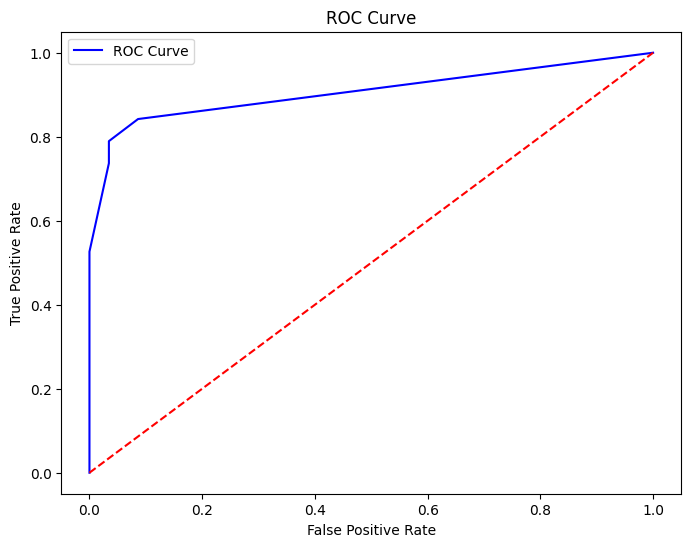

In [ ]:
#Plot the ROC curve.

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Getting predicted probabilities
y_proba = knn.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

